<a href="https://colab.research.google.com/github/dkchebet7/Regression/blob/master/Daisy__Chebet_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reseach Question

Give a prediction results between two teams based on home and away and based on whether the game is friendly or not




## Metrics of success

 Give conclusive results from the analysis

## Experimental Design

1. Importing all the necessary libraries
2. clean data
3. Perfom Experimental designs
4. Perfom Regression Analysis(Logistic regression and Polynomial regrssion)
5. Give Insightful Conclusions from my analysis



## Libraries

In [0]:
## Importing necessray libraries

import pandas as pd
import numpy as np

## Plotting Libraries
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline






## Loading datasets

In [58]:
## Loading the fifa datase

fifa = pd.read_csv('/content/fifa_ranking.csv')

## Previewing fifa dataset
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [3]:
## Checking the size of the fifa data
fifa.shape

(57793, 16)

In [4]:
## Checking for null values 

fifa.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

There are no null values in each of the columns of fifa 

In [59]:
##Loading the results dataset

results = pd.read_csv('/content/results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
## Checking the size of the data

results.shape

(40839, 9)

In [7]:
## Checking for null values

results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

There are no null values in the data

## Data Cleaning

#### Changing date time format

In [0]:
## Changing the date time format in both datasets

## changing the dates into date_time format in each dataset

results ['date'] = pd.to_datetime(results['date'])
fifa ['rank_date'] = pd.to_datetime(fifa['rank_date'])


here, both the results and fifa datasets have a changed date and time format and the two(date and time)can now be separrated 

In [0]:
## Extracting the year and month from the date column in both the fifa and results dataset



results ['year'] = pd.DatetimeIndex(results['date']).year
results ['month'] = pd.DatetimeIndex(results['date']).month


fifa ['year'] = fifa ['rank_date'].dt.year
fifa ['month'] = fifa ['rank_date'].dt.month


## ## Here, we will have a column for each variable(date and month)


Since the date and time were put into a format that can be separrated, we now extract the two and the resulting dataframe will contain three columns of 'year','month' and 'date'

#### Merging the two datasets

In [0]:
# ## Merging  the datasets on year and month

# Main_data = pd.merge(fifa,results,on = ["year","month"])

### This was a wrong way of merging since the resulting data has a different names in country and country_full

In [0]:

## splitting and merging on home team

Home_team = pd.merge(results, fifa, how = 'left', left_on=['year', 'month', 'home_team'], right_on=['year', 'month', 'country_full'])


In [0]:
## Renaming the rank to home rank

Home_team = Home_team.rename(columns = {'rank': 'home_rank'})

In [65]:
## Viewing the data
Home_team.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [0]:
## splitting and Merging on away team

Away_team = pd.merge(results, fifa, how = 'left', left_on=['year', 'month', 'away_team'], right_on=['year', 'month', 'country_full'])


In [0]:
## Renaming the rank to home rank

Away_team = Away_team.rename(columns = {'rank': 'away_rank'})

In [68]:
## Viewing the away team dataset
Away_team.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,away_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [69]:
## Merging the away team data with the home team data  

df = pd.merge(Away_team, Home_team, on= ['year','month'])

## Viewing the first 5 items in the merged data
df.head()

,date_x,home_team_x,away_team_x,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,year,month,away_rank,country_full_x,country_abrv_x,total_points_x,previous_points_x,rank_change_x,cur_year_avg_x,cur_year_avg_weighted_x,last_year_avg_x,last_year_avg_weighted_x,two_year_ago_avg_x,two_year_ago_weighted_x,three_year_ago_avg_x,three_year_ago_weighted_x,confederation_x,rank_date_x,date_y,home_team_y,away_team_y,home_score_y,away_score_y,tournament_y,city_y,country_y,neutral_y,home_rank,country_full_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y,confederation_y,rank_date_y
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [49]:
df.shape

(2949686, 52)

The merged data has 2949686 rows and 52 columns

In [0]:
## Viewing columns

df.columns

Index(['date_x', 'home_team_x', 'away_team_x', 'home_score_x', 'away_score_x',
       'tournament_x', 'city_x', 'country_x', 'neutral_x', 'year', 'month',
       'away_rank', 'country_full_x', 'country_abrv_x', 'total_points_x',
       'previous_points_x', 'rank_change_x', 'cur_year_avg_x',
       'cur_year_avg_weighted_x', 'last_year_avg_x',
       'last_year_avg_weighted_x', 'two_year_ago_avg_x',
       'two_year_ago_weighted_x', 'three_year_ago_avg_x',
       'three_year_ago_weighted_x', 'confederation_x', 'rank_date_x', 'date_y',
       'home_team_y', 'away_team_y', 'home_score_y', 'away_score_y',
       'tournament_y', 'city_y', 'country_y', 'neutral_y', 'home_rank',
       'country_full_y', 'country_abrv_y', 'total_points_y',
       'previous_points_y', 'rank_change_y', 'cur_year_avg_y',
       'cur_year_avg_weighted_y', 'last_year_avg_y',
       'last_year_avg_weighted_y', 'two_year_ago_avg_y',
       'two_year_ago_weighted_y', 'three_year_ago_avg_y',
       'three_year_ago_weig

#### Dropping columns

In [0]:
## Dropping the duplicated columns


dropcolumns = ['date_y','home_team_y', 'away_team_y', 'home_score_y', 'away_score_y','tournament_y', 'city_y', 'country_y', 'neutral_y','country_full_y', 
'country_abrv_y', 'total_points_y','previous_points_y', 'rank_change_y', 'cur_year_avg_y','cur_year_avg_weighted_y', 'last_year_avg_y',
'last_year_avg_weighted_y', 'two_year_ago_avg_y', 'two_year_ago_weighted_y', 'three_year_ago_avg_y', 'three_year_ago_weighted_y', 
               'confederation_y', 'rank_date_y']

df.drop(dropcolumns,axis = 1,inplace = True)

In [0]:
## Renaming columns of the dataset

df.columns = ['date','home_team','away_team','home_score','away_score','tournament','city','country','neutral','year','month',
                      'away_rank','country_full','country_abrv','total_points','previous_points','rank_change','cur_year_avg','cur_year_avg_weighted',
                      'last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted',
                      'confederation','rank_date','home_rank']

In [0]:
## Dropping unecessary columns

df = df.drop(['date','country_full','country_abrv','total_points','previous_points','rank_change','cur_year_avg','cur_year_avg_weighted',
              'last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg',
              'three_year_ago_weighted','rank_date'], axis = 1)

In [53]:
#Viewing the resulting dataset
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,away_rank,confederation,home_rank
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,NaN,NaN,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,NaN,NaN,NaN
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,NaN,NaN,NaN
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,NaN,NaN,NaN


In [73]:
## Checking the size of the data

df.shape

(2949686, 13)

In [0]:
#creating a new column to show the results of the matches played, either a win or loss or draw
match = []
for i in range(len(df['home_team'])):
  if df['home_score'][i] > df['away_score'][i]:
    match.append('win')
  elif df['home_score'][i] < df['away_score'][i]:
    match.append('loose')
  else:
    match.append('draw')
    
df['game_result'] = match

In [75]:
## Previewing the dataframe

df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,away_rank,confederation,home_rank,game_result
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,NaN,NaN,NaN,draw
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,NaN,NaN,NaN,win
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,NaN,NaN,NaN,win
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,NaN,NaN,NaN,draw
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,NaN,NaN,NaN,win


In [76]:
## Checking for null values in each column

df.isnull().sum()

home_team              0
away_team              0
home_score             0
away_score             0
tournament             0
city                   0
country                0
neutral                0
year                   0
month                  0
away_rank        1099699
confederation    1099699
home_rank        1090853
game_result            0
dtype: int64

There are null values in the away_rank,confederation and home_rank

In [0]:
## Dropping all null values

df = df.dropna()

In [78]:
## Checing if there is some resulting null values left

df.isnull().sum()

home_team        0
away_team        0
home_score       0
away_score       0
tournament       0
city             0
country          0
neutral          0
year             0
month            0
away_rank        0
confederation    0
home_rank        0
game_result      0
dtype: int64

The dataset has no null values in every column as seen above

In [79]:
df.shape

(1632693, 14)

the resulting data contains 13 columns and 1632693 rows

In [0]:
## Saving the df as a csv file 

df.to_csv('clean_df.csv')

In [0]:
import pandas as pd

## Loading the new data created
df2 = pd.read_csv('/content/clean_df.csv')



#### Checking for outliers

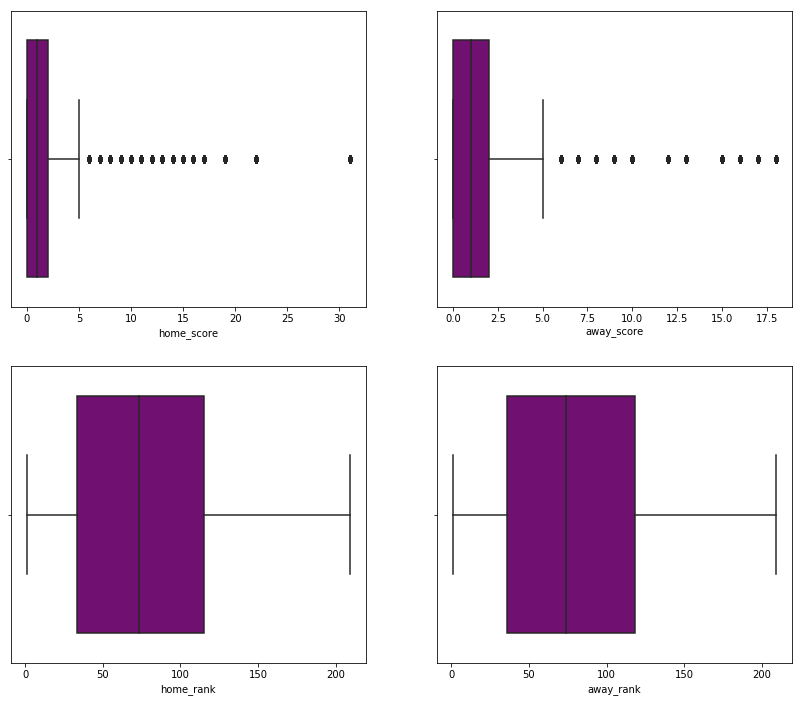

In [5]:
## Checking for outliers in columns; home_score, away_score, home_rank and away_rank

import matplotlib.pyplot as plt
import seaborn as sns


## creating a variable containing the features we want to loop over
outliers = ['home_score', 'away_score','home_rank', 'away_rank']

## specifying the number of columns and rows we want in the resulting figure.This can be altered  at will
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize=(14,12))


##  Creating a function to loop over the given multiple features and give us the boxplot of the outliers## 
for ax, data,column in zip(axes.flatten(),df2,outliers):
  sns.boxplot(df2[column],ax=ax, color = 'purple')

From the boxplots, home_score and away_score are the only datasets with meaningful outliers.

In [0]:
## Dropping the outliers in home score and away score

df2 = df2[df2['home_score']<=5] 

df2 = df2[df2['away_score']<=5]

This means all values of home score greater than a score of 5 is dropped


In [7]:
df2.shape

(1571621, 15)

## Exploratory Data Analysis

In [0]:
df2.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,away_rank,confederation,home_rank
628370,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,67.0,CONMEBOL,19.0
628371,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,67.0,CONMEBOL,70.0


In [32]:
## Checking for unique values 
## Tournaments unique values


df2.tournament.unique()

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament',
       'CFU Caribbean Cup qualification', 'African Cup of Nations',
       'CFU Caribbean Cup', 'UEFA Euro qualification', 'Kirin Cup',
       'FIFA World Cup', 'Oceania Nations Cup qualification',
       'Baltic Cup', 'Gulf Cup', 'Simba Tournament', 'CECAFA Cup',
       'Dynasty Cup', "King's Cup", 'SAFF Cup', 'Copa Paz del Chaco',
       'Korea Cup', 'USA Cup', 'Copa América', 'Merdeka Tournament',
       'South Pacific Games', 'UNCAF Cup', 'Oceania Nations Cup',
       'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'Lunar New Year Cup',
       'AFF Championship', 'AFC Asian Cup', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup', 'Nehru Cup',
       'COSAFA Cup', 'Tournoi de France', 'Gold Cup qualificati

In [86]:
## Frequency table showing the top 10 tournaments 

## Plotting the tournaments


tournament_freq =  df2.tournament.value_counts()
tournament_freq.head(10)

Friendly                                542253
FIFA World Cup qualification            424137
UEFA Euro qualification                 134310
African Cup of Nations qualification     96126
AFC Asian Cup qualification              34262
UEFA Euro                                28006
Copa América                             24020
CFU Caribbean Cup qualification          21390
CECAFA Cup                               21149
African Cup of Nations                   19423
Name: tournament, dtype: int64

Friendlies are the most played games followed by World_cup, etc in the order above

In [8]:
#using a function to have 3 tournament types(World cup, Friendly and others)


def game_type(x):
  if x == 'Fifa World Cup':
    return 'world cup'
  elif x == 'Friendly':
    return 'friendly'
  else:
    return 'others'
  
  
#applying the function for the tournament types
df2['game_type']=df2.tournament.apply(lambda x: game_type(x))


#dropping the column tornament and remaining with the tourna column that has the 3 tournament types
df2.drop('tournament', axis =1).head()

,Unnamed: 0,home_team,away_team,home_score,away_score,city,country,neutral,year,month,away_rank,confederation,home_rank,game_result,game_type
0,628370,Colombia,Paraguay,0,0,Barranquilla,Colombia,False,1993,8,67.0,CONMEBOL,19.0,draw,others
1,628371,Colombia,Paraguay,0,0,Barranquilla,Colombia,False,1993,8,67.0,CONMEBOL,70.0,draw,others
2,628372,Colombia,Paraguay,0,0,Barranquilla,Colombia,False,1993,8,67.0,CONMEBOL,22.0,draw,others
3,628373,Colombia,Paraguay,0,0,Barranquilla,Colombia,False,1993,8,67.0,CONMEBOL,94.0,draw,others
4,628374,Colombia,Paraguay,0,0,Barranquilla,Colombia,False,1993,8,67.0,CONMEBOL,58.0,draw,others


In [89]:
df2.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [90]:
df2.year.value_counts().head()

2008    102521
2015     97645
2016     94753
2011     94444
2012     93507
Name: year, dtype: int64

## Polynomial Regression

Polynomial regression is used where the dependent and independent variables are not linear

#### Importing necessary libraries

In [0]:
## Importing necessary Libraries

import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Plotting scatter plot of scores against rank

In [92]:
df2.dtypes

home_team         object
away_team         object
home_score         int64
away_score         int64
tournament        object
city              object
country           object
neutral             bool
year               int64
month              int64
away_rank        float64
confederation     object
home_rank        float64
game_result       object
game_type         object
dtype: object

##### HOME RANK

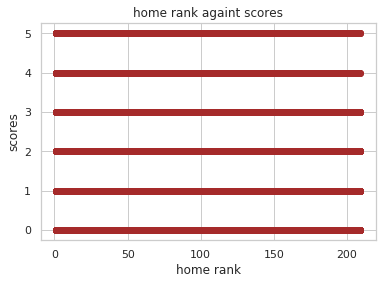

In [17]:
## Assigning data into groups of x and y

X= df2['home_rank'].values.reshape(-1,1)
y = df2['home_score'].values


## Plotting x and y to check the distribution

sns.set(context = 'notebook',style = 'whitegrid')

plt.scatter(X,y, color = 'brown')
plt.xlabel('home rank')
plt.ylabel('scores')
plt.title('home rank againt scores')
plt.show()



the datapoints are clearly not linealy related ,we can  therefore try and use polynomial regression HOWEVER, there may be istances of underfitting as the dataset has no given pattern

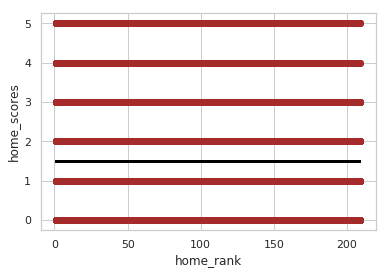

In [20]:
## Polynomial Regression

## Split data into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2,random_state = 0)


## Fitting Polynomial regression

poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(X)


pol = LinearRegression()
pol.fit(x_poly,y)


## Plotting/Visualizing Polynomial Regression
plt.scatter(X,y, color = 'brown')
plt.plot(X, pol.predict(x_poly), color = 'black')
plt.xlabel ('home_rank')
plt.ylabel ('home_scores')
plt.show()


In [95]:
## Assessing Accuracy of the model

y_pred = pol.predict(x_poly)

print('Mean squared Error:', metrics.mean_squared_error(y,y_pred))
print('Root Mean squared Error:', np.sqrt(metrics.mean_squared_error(y,y_pred)))

Mean squared Error: 1.653033697756118
Root Mean squared Error: 1.2857035808288464


In [0]:
df2.home_score.describe()

count    1.632693e+06
mean     1.628874e+00
std      1.647671e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.100000e+01
Name: home_score, dtype: float64

The mean of the score(1.632693)s and the rmse(1.64766) are at a close proximity indicating low variance of the errors.

##### AWAY RANK

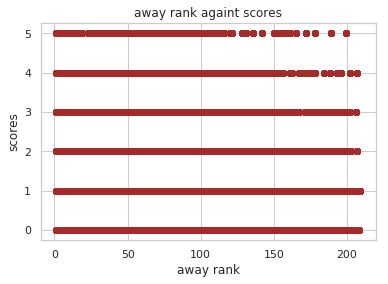

In [21]:
## Assigning data into groups of x and y

X= df2['away_rank'].values.reshape(-1,1)
y = df2['away_score'].values


## Plotting x and y to check the distribution

plt.scatter(X,y, color = 'brown')
plt.xlabel('away rank')
plt.ylabel('scores')
plt.title('away rank againt scores')
plt.show()



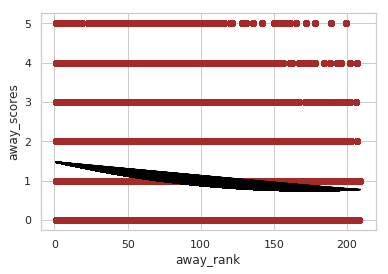

In [22]:
## Polynomial Regression

## Split data into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2,random_state = 0)


## Fitting Polynomial regression

poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(X)


pol = LinearRegression()
pol.fit(x_poly,y)


## Plotting/Visualizing Polynomial Regression
plt.scatter(X,y, color = 'brown')
plt.plot(X, pol.predict(x_poly), color = 'black')
plt.xlabel ('away_rank')
plt.ylabel ('away_scores')
plt.show()


In [98]:
#
## Assessing Accuracy of the model

y_pred = pol.predict(x_poly)

print('Mean squared Error:', metrics.mean_squared_error(y,y_pred))
print('Root Mean squared Error:', np.sqrt(metrics.mean_squared_error(y,y_pred)))

Mean squared Error: 1.1770999168853078
Root Mean squared Error: 1.0849423564804297


In [99]:
df2.away_score.describe()

count    1.571621e+06
mean     1.030387e+00
std      1.107577e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.000000e+00
Name: away_score, dtype: float64

The mean of the scores and the rmse are at a close proximity indicating low variance of the errors.

### Conclusion

Model 1 ;  Polynomial Distribution: 

 i)The regression model was not a good fit for the model as there clearly are instances of underfitting.
 
 ii) The RMSE score was slightly commendable due to its close proximity to the mean, however this can be a case of the negative cancelling out with the positives and thus this results should be reconsidered

In [0]:
## Importing Necessary Libraries

from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split




## Logistic Regression

In [24]:
df2.head(2)

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,away_rank,confederation,home_rank,game_result,game_type
0,628370,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,67.0,CONMEBOL,19.0,draw,others
1,628371,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,67.0,CONMEBOL,70.0,draw,others


In [0]:
#creating a dataframe to use logistic regression model

table = df2[['home_team', 'away_team', 'home_score', 'away_score', 'year', 'home_rank', 'away_rank', 'game_type','game_result']]

In [26]:
## Previewing the dataframe

table.head()

,home_team,away_team,home_score,away_score,year,home_rank,away_rank,game_type,game_result
0,Colombia,Paraguay,0,0,1993,19.0,67.0,others,draw
1,Colombia,Paraguay,0,0,1993,70.0,67.0,others,draw
2,Colombia,Paraguay,0,0,1993,22.0,67.0,others,draw
3,Colombia,Paraguay,0,0,1993,94.0,67.0,others,draw
4,Colombia,Paraguay,0,0,1993,58.0,67.0,others,draw


Text(0.5, 1.0, 'correlation between feature variables')

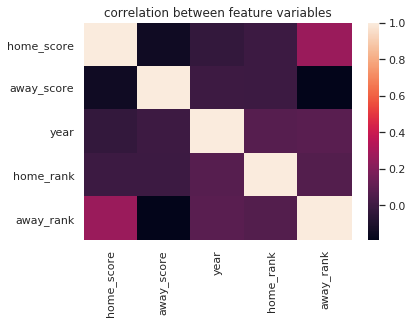

In [27]:
# Checking for independence between features using correation matrix in a heatmap
# 
sns.heatmap(table.corr())  
plt.title('correlation between feature variables')

In [28]:
## grouping into x and y
#

X = table.drop(['game_result','home_score','away_score'],axis=1)
y = table['game_result']

#encoding the features to obtain numerical values in a the cateforical(object) variables
X = pd.get_dummies(X, drop_first=True)
X.head()




,year,home_rank,away_rank,home_team_Albania,home_team_Algeria,home_team_American Samoa,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahamas,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Basque Country,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bonaire,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Brittany,home_team_Brunei,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burma,home_team_Burundi,...,away_team_Sierra Leone,away_team_Singapore,away_team_Slovakia,away_team_Slovenia,away_team_Solomon Islands,away_team_Somalia,away_team_South Africa,away_team_South Sudan,away_team_Spain,away_team_Sri Lanka,away_team_Sudan,away_team_Suriname,away_team_Sweden,away_team_Switzerland,away_team_Syria,away_team_Tahiti,away_team_Tajikistan,away_team_Tanzania,away_team_Thailand,away_team_Togo,away_team_Tonga,away_team_Trinidad and Tobago,away_team_Tunisia,away_team_Turkey,away_team_Turkmenistan,away_team_Turks and Caicos Islands,away_team_Uganda,away_team_Ukraine,away_team_United Arab Emirates,away_team_Uruguay,away_team_Uzbekistan,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Wales,away_team_Yemen,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe,game_type_others
0,1993,19.0,67.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1993,70.0,67.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1993,22.0,67.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1993,94.0,67.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1993,58.0,67.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
## Splitting data into test and train set with the train set being 80% of the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)



#fitting and training the model
logReg = LogisticRegression()
logReg.fit(X_train, y_train)


##Predicting using the model created
y_pred = logReg.predict(X_test)
y_pred


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array(['win', 'win', 'win', ..., 'win', 'win', 'loose'], dtype=object)

In [32]:
## Evaluating the accuracy of our model
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)


0.5963604549431321

This model has a 59.63% accuracte. This is a poor perfomance although anticipated from the distribution of variables seen in the scatter plot 